In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("global_cancer_patients_2015_2024.csv")

In [4]:

data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [6]:
data.duplicated().sum()

0

In [7]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

### Descriptive analysis

In [8]:
# data.Age

data["Age"]

0        71
1        34
2        80
3        40
4        43
         ..
49995    80
49996    40
49997    74
49998    21
49999    22
Name: Age, Length: 50000, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

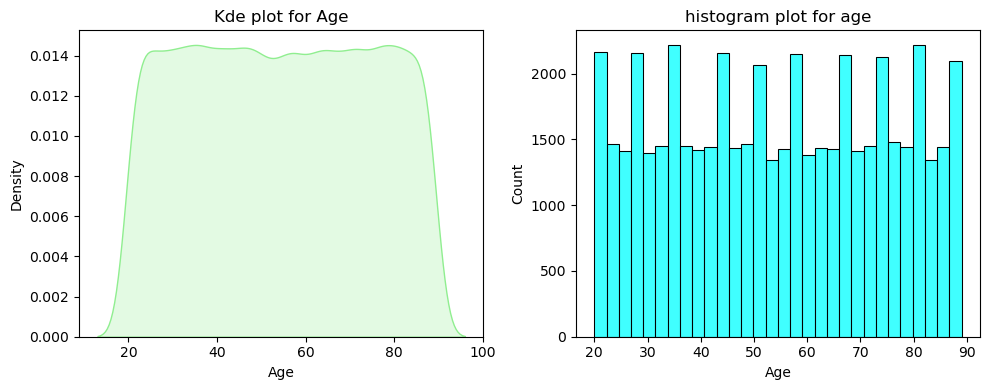

In [9]:
# plotting for age column

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data["Age"], fill=True, color="lightgreen")
plt.title("Kde plot for Age")

plt.subplot(1,2,2)
sns.histplot(data["Age"], bins=30, kde=False, color="cyan")
plt.title("histogram plot for age")

plt.tight_layout()
plt.show


In [10]:
data["Age"].describe()

count    50000.000000
mean        54.421540
std         20.224451
min         20.000000
25%         37.000000
50%         54.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

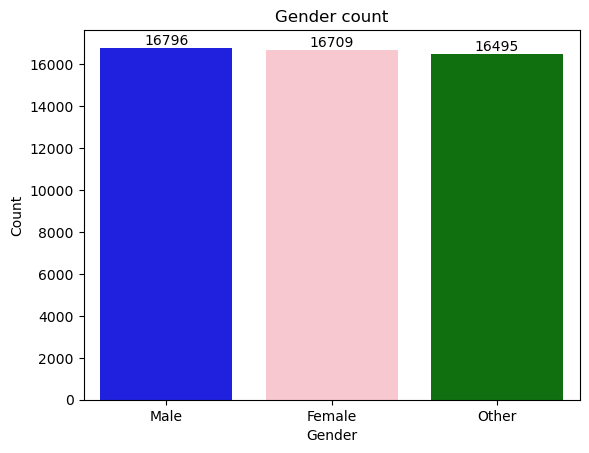

In [11]:
#gender columns

data['Gender'].value_counts()

sns.barplot(x= data['Gender'].value_counts().index,
            y=data['Gender'].value_counts().values,
            palette=["blue","pink", "green"]
            )

for i, v in enumerate(data["Gender"].value_counts()):
    plt.text(i,v,str(v), ha='center', va='bottom')


plt.title("Gender count")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()

In [12]:
data['Gender'].value_counts()


Gender
Male      16796
Female    16709
Other     16495
Name: count, dtype: int64

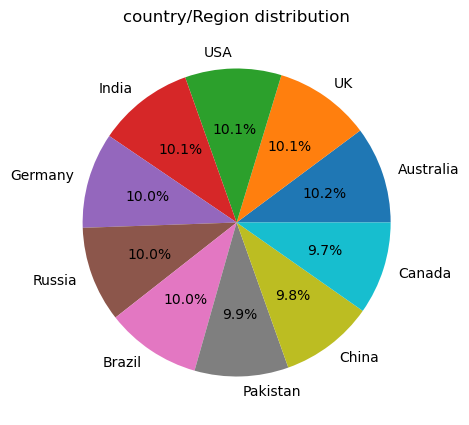

In [13]:
# countries columns

country_counts = data["Country_Region"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(x=country_counts.values,
        labels=country_counts.index,
        autopct= '%1.1f%%'
        )

plt.title("country/Region distribution")
plt.show()

In [14]:
country_counts

Country_Region
Australia    5092
UK           5060
USA          5060
India        5040
Germany      5024
Russia       5017
Brazil       5004
Pakistan     4926
China        4913
Canada       4864
Name: count, dtype: int64

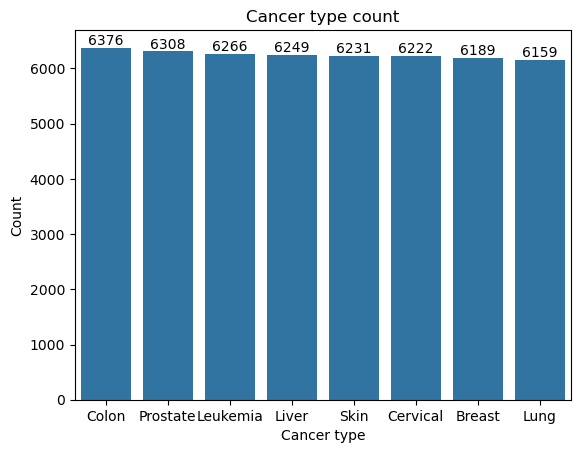

In [15]:
  # cancer type

data["Cancer_Type"].value_counts()

sns.barplot(x=data["Cancer_Type"].value_counts().index,
            y=data["Cancer_Type"].value_counts().values
)

for i , v in enumerate(data["Cancer_Type"].value_counts()):
    plt.text(i,v,str(v), ha="center", va="bottom")


plt.title("Cancer type count")
plt.xlabel("Cancer type")
plt.ylabel("Count")
plt.show()

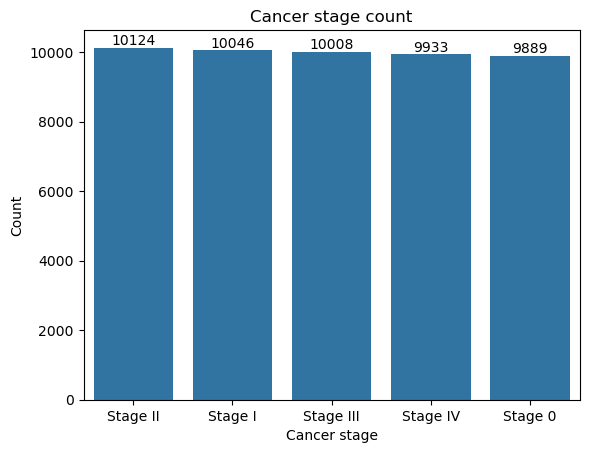

In [16]:
# cancer stage

data["Cancer_Stage"].value_counts()

sns.barplot(x=data["Cancer_Stage"].value_counts().index,
            y=data["Cancer_Stage"].value_counts().values
)

for i , v in enumerate(data["Cancer_Stage"].value_counts()):
    plt.text(i,v,str(v), ha="center", va="bottom")


plt.title("Cancer stage count")
plt.xlabel("Cancer stage")
plt.ylabel("Count")
plt.show()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

<function matplotlib.pyplot.show(close=None, block=None)>

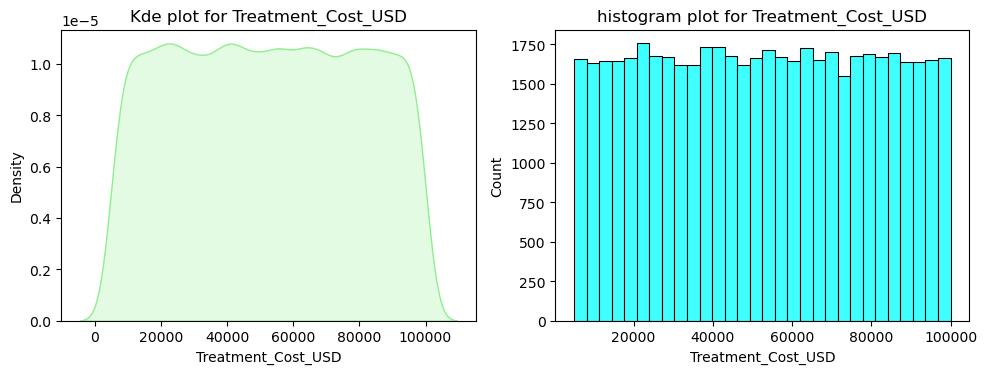

In [18]:
#plotting for treatment cost

data["Treatment_Cost_USD"]



plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data["Treatment_Cost_USD"], fill=True, color="lightgreen")
plt.title("Kde plot for Treatment_Cost_USD")

plt.subplot(1,2,2)
sns.histplot(data["Treatment_Cost_USD"], bins=30, kde=False, color="cyan")
plt.title("histogram plot for Treatment_Cost_USD")

plt.tight_layout()
plt.show



In [19]:
data["Treatment_Cost_USD"].describe()

count    50000.000000
mean     52467.298239
std      27363.229379
min       5000.050000
25%      28686.225000
50%      52474.310000
75%      76232.720000
max      99999.840000
Name: Treatment_Cost_USD, dtype: float64

In [20]:
# analyzing the risk factors

columns_of_interest = ['Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

summary = data[columns_of_interest].agg(['mean', 'std', 'min', 'max'])

## Determine the relationship between risk factors and cancer severity


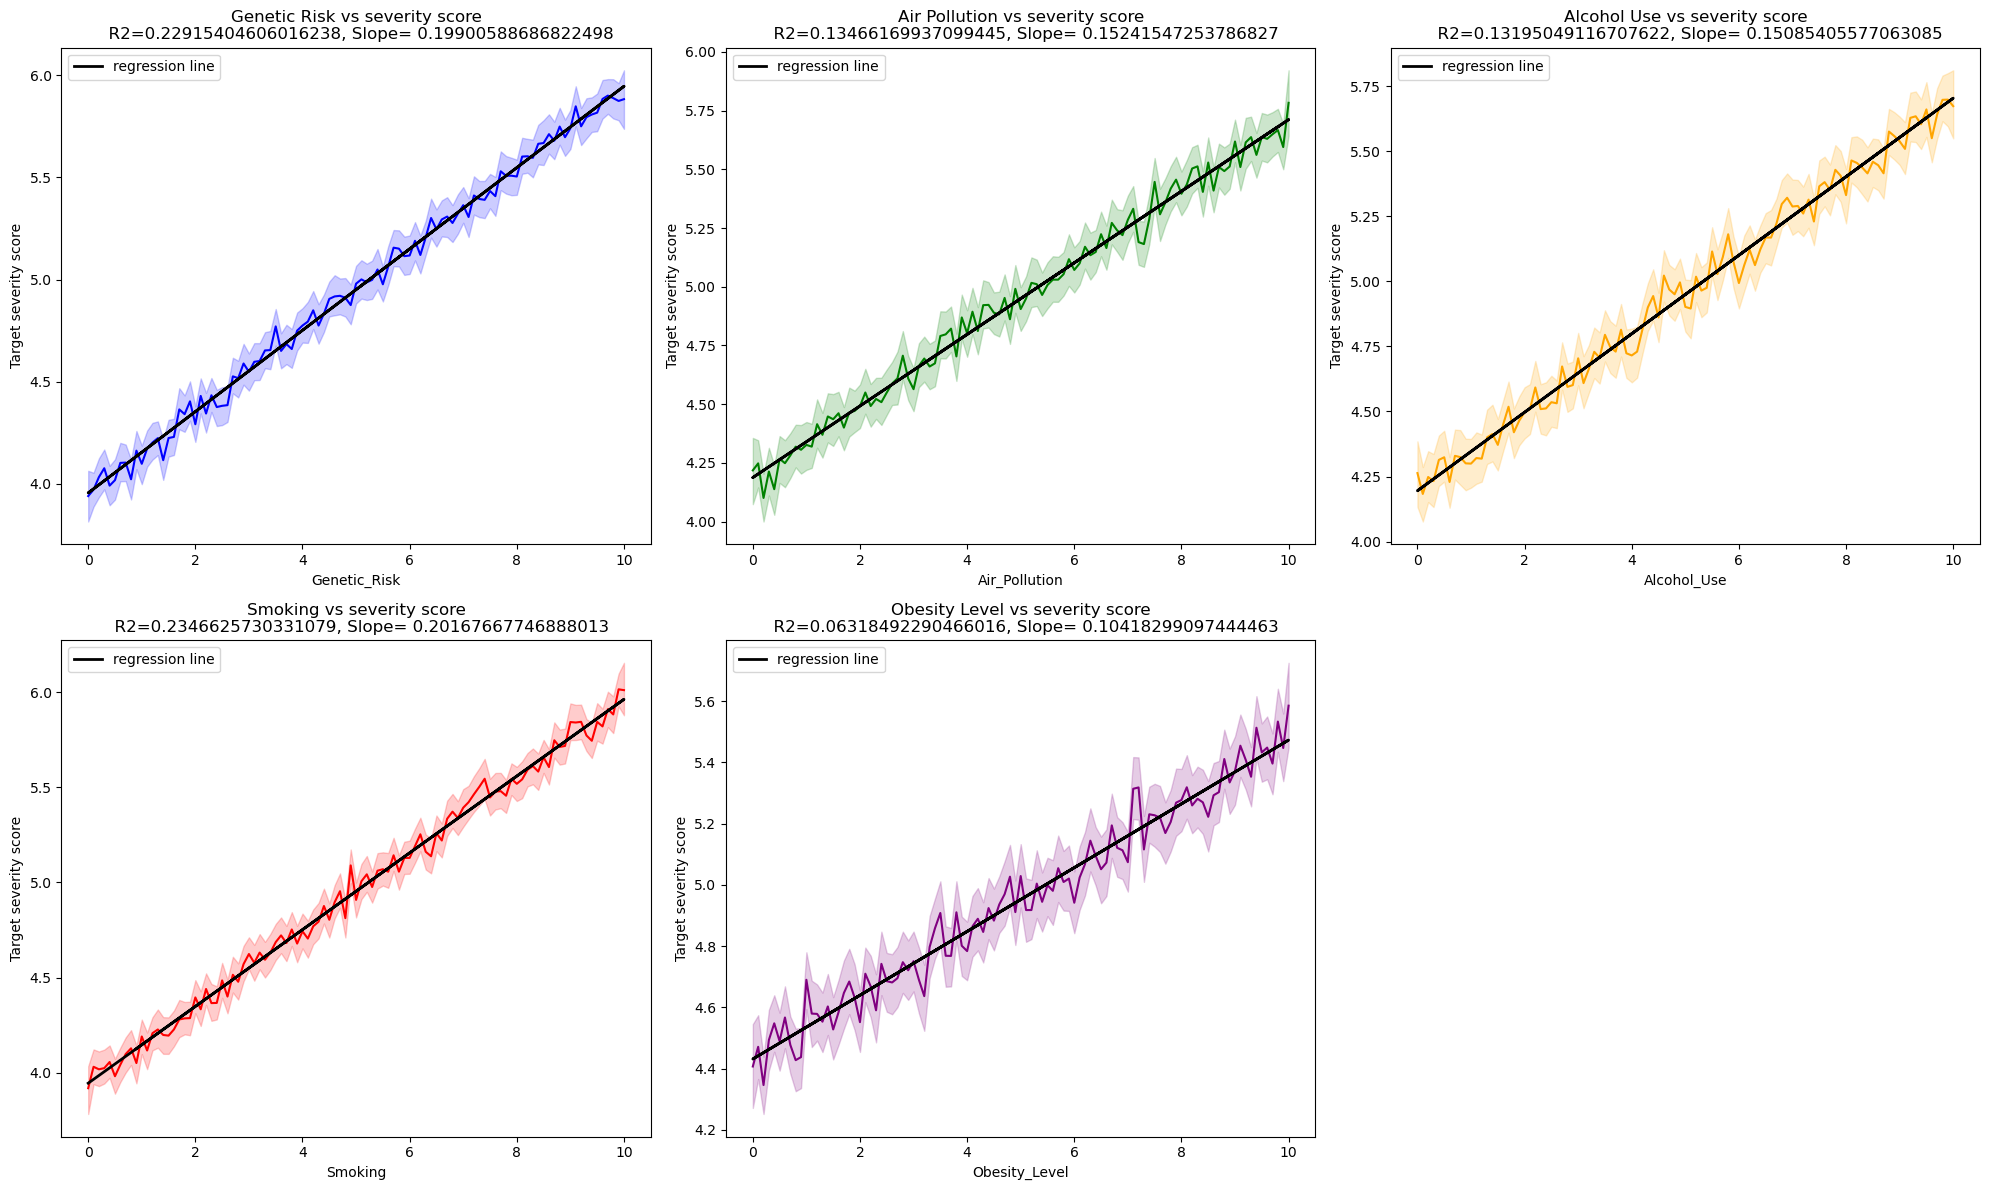

In [21]:
from scipy.stats import linregress

risk_factors = ['Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

titles = ['Genetic Risk',
       'Air Pollution', 'Alcohol Use', 'Smoking', 'Obesity Level']

colors = ["blue", "green", "orange", "red", "purple"]

plt.figure(figsize=(20,12))
for i , (factor, title, color) in enumerate(zip(risk_factors,titles, colors),1):
    plt.subplot(2,3,i)
    x= data[factor]
    y=data["Target_Severity_Score"]
    slope, intercept, r_value , p_value, std_err= linregress(x,y)
    r_squared  = r_value**2

    sns.lineplot(x=factor, y="Target_Severity_Score", data=data, color=color)

    plt.plot(x,x*slope+intercept,color="black", linewidth= 2, label="regression line")
    plt.title(f"{title} vs severity score\n  R2={r_squared}, Slope= {slope}")
    plt.xlabel(factor)
    plt.ylabel("Target severity score")
    plt.legend()

plt.tight_layout()
plt.show()





## Analyze the proportion of early-stage diagnoses by cancer type

In [22]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [23]:
data["Cancer_Type"].unique()

array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical',
       'Prostate', 'Liver'], dtype=object)

In [24]:
stage_count = data[data["Cancer_Type"]== "Lung"] ["Cancer_Stage"].value_counts()

early_stage_sum = stage_count.get("Stage 0", 0)+ stage_count.get("Stage I",0)

total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of lungs cancer daignosed at stage 0 and stage I: {proportion}")




proportion of lungs cancer daignosed at stage 0 and stage I: 38.43156356551388


In [25]:
stage_count = data[data["Cancer_Type"]=="Leukemia"] ["Cancer_Stage"].value_counts()

early_stage_sum= stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)

total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Leukemia cancer daignosed at stage 0 and stage I: {proportion}")


proportion of Leukemia cancer daignosed at stage 0 and stage I: 39.53080114905841


In [26]:
stage_count = data[data["Cancer_Type"]=="Breast"] ["Cancer_Stage"].value_counts()

early_stage_sum= stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)

total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Breast cancer daignosed at stage 0 and stage I: {proportion}")


proportion of Breast cancer daignosed at stage 0 and stage I: 39.47325900791727


In [27]:
early_stage_sumstage_count = data[data["Cancer_Type"]=="Colon"] ["Cancer_Stage"].value_counts()

early_stage_sum= stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)

total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Colon cancer daignosed at stage 0 and stage I: {proportion}")


proportion of Colon cancer daignosed at stage 0 and stage I: 39.47325900791727


In [28]:
stage_count = data[data["Cancer_Type"]=="Skin"] ["Cancer_Stage"].value_counts()

early_stage_sum= stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)

total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Skin cancer daignosed at stage 0 and stage I: {proportion}")


proportion of Skin cancer daignosed at stage 0 and stage I: 40.41084898090194


In [29]:
stage_count = data[data["Cancer_Type"]=="Cervical"] ["Cancer_Stage"].value_counts()

early_stage_sum= stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)

total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Cervical cancer daignosed at stage 0 and stage I: {proportion}")


proportion of Cervical cancer daignosed at stage 0 and stage I: 39.85856637737062


In [30]:
stage_count = data[data["Cancer_Type"]=="Prostate"] ["Cancer_Stage"].value_counts()

early_stage_sum= stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)

total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Prostate cancer daignosed at stage 0 and stage I: {proportion}")


proportion of Prostate cancer daignosed at stage 0 and stage I: 40.187064045656314


In [31]:
stage_count = data[data["Cancer_Type"]=="Liver"] ["Cancer_Stage"].value_counts()

early_stage_sum= stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)

total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Liver cancer daignosed at stage 0 and stage I: {proportion}")


proportion of Liver cancer daignosed at stage 0 and stage I: 40.614498319731155


In [32]:
# claculate the Survival_Years rate of early stage VS late stage
# write a code to do the calculation of the proportion of all cancer daignosed at 
# stage 0 and stage I

## Identify key predictors of cancer severity and survival years

In [33]:
features = ['Age','Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']


targets = ['Survival_Years', 'Target_Severity_Score']

# calculate correlations

pearson_corr = data[features+targets].corr(method="pearson")
spearman_corr = data[features+targets].corr(method="spearman")

# slice out only thr relationships with targets variabels

pearson_results = pearson_corr[targets]
spearman_results = spearman_corr[targets]

#combine both
correlation_df = pd.concat([pearson_results,spearman_results], axis=1, keys=["Pearson","Spearman"])
correlation_df


Pearson                             Spearman  \
                      Survival_Years Target_Severity_Score Survival_Years   
Age                        -0.000147             -0.001481      -0.000149   
Genetic_Risk                0.001708              0.478700       0.001684   
Air_Pollution               0.000893              0.366963       0.000841   
Alcohol_Use                -0.000527              0.363250      -0.000543   
Smoking                     0.001371              0.484420       0.001372   
Obesity_Level               0.009771              0.251366       0.009780   
Survival_Years              1.000000              0.004161       1.000000   
Target_Severity_Score       0.004161              1.000000       0.003431   

                                             
                      Target_Severity_Score  
Age                               -0.002076  
Genetic_Risk                       0.472193  
Air_Pollution                      0.357528  
Alcohol_Use                        0.354694  
Smoking                            0.477881  
Obesity_Level                      0.243152  
Survival_Years                     0.003431  
Target_Severity_Score              1.000000

In [34]:
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [35]:
# random forest for target severity score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# caonveting categorical columns to numerical columns
categorical_cols= ["Gender","Country_Region","Cancer_Type","Cancer_Stage"]
for col in categorical_cols:
    le= LabelEncoder()
    data[col]=le.fit_transform(data[col])

# Preparing  features and input
X= data.drop(columns=["Patient_ID","Survival_Years","Target_Severity_Score","Treatment_Cost_USD"])
y_severity= data["Target_Severity_Score"]

# train test split
X_train_s, X_test_s, y_train_s, y_test_s= train_test_split(X, y_severity, test_size=0.2, random_state=40)

# train the model
model= RandomForestRegressor(n_estimators=200, max_depth= None , min_samples_split=2,min_samples_leaf=1, random_state=40)
model.fit(X_train_s, y_train_s)

# evalaute the model
train_r2_severity= r2_score(y_train_s , model.predict(X_train_s))
test_r2_severity= r2_score(y_test_s , model.predict(X_test_s))


In [36]:
print(train_r2_severity)
print(test_r2_severity)

0.9689503792116058
0.7752278237418935


In [37]:
feature_importance_severity = pd.Series(model.feature_importances_,index=x.columns,).sort_values(ascending=True)

#plotting of import features 
plt.figure(figsize=(10,6))
feature_importance_severity.plot(kind="bar", color="skyblue")
plt.xlabel("Features")
plt.ylabel("importance score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
# random forest for target severity score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# caonveting categorical columns to numerical columns
categorical_cols= ["Gender","Country_Region","Cancer_Type","Cancer_Stage"]
for col in categorical_cols:
    le= LabelEncoder()
    data[col]=le.fit_transform(data[col])

# Preparing  features and input
X= data.drop(columns=["Patient_ID","Survival_Years","Target_Severity_Score","Treatment_Cost_USD"])
y_severity= data["Survival_Years"]

# train test split
X_train_s, X_test_s, y_train_s, y_test_s= train_test_split(X, y_severity, test_size=0.2, random_state=40)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# train the model
model= RandomForestRegressor(random_state=40)
GSC= GridSearchCV(model , param_grid, cv=3, scoring="r2", n_jobs=-1)
GSC.fit(X_train_s, y_train_s)

best_rf_severity= GSC.best_estimator_

# evalaute the model
train_r2_severity= r2_score(y_train_s , best_rf_severity.predict(X_train_s))
test_r2_severity= r2_score(y_test_s , best_rf_severity.predict(X_test_s))



In [ ]:
print(train_r2_severity)
print(test_r2_severity)

0.008998065861791305
-0.0003487352301705382


<Axes: xlabel='Survival_Years', ylabel='Count'>

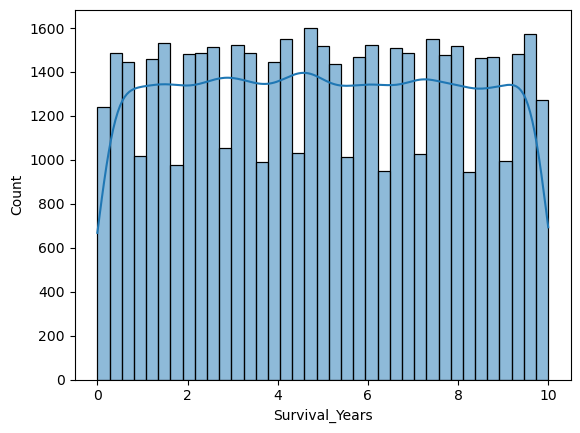

In [ ]:
import seaborn as sns
sns.histplot(data["Survival_Years"], kde=True)



In [ ]:
data.corr(numeric_only=True)["Survival_Years"].sort_values(ascending=True)

Gender                  -0.007121
Cancer_Stage            -0.003014
Cancer_Type             -0.001717
Alcohol_Use             -0.000527
Treatment_Cost_USD      -0.000429
Age                     -0.000147
Year                     0.000018
Air_Pollution            0.000893
Smoking                  0.001371
Genetic_Risk             0.001708
Target_Severity_Score    0.004161
Country_Region           0.005121
Obesity_Level            0.009771
Survival_Years           1.000000
Name: Survival_Years, dtype: float64

## Explore the economic burden of cancer treatment across different demographics and countries

In [41]:
data = pd.read_csv("global_cancer_patients_2015_2024.csv")
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [ ]:
country_gender_cost = data.groupby(["Country_Region","Gender"])["Treatment_Cost_USD"].mean().reset_index()

In [45]:
data["Age_Group"] = pd.cut(data["Age"],bins=[0,30,45,60,75,100],labels=["0-30","31-45","46-60","61-75","76+"])

In [46]:
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Age_Group
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92,61-75
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65,31-45
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84,76+
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12,31-45
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62,31-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63,76+
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03,31-45
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02,61-75
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54,0-30


<Axes: xlabel='Country_Region', ylabel='Treatment_Cost_USD'>

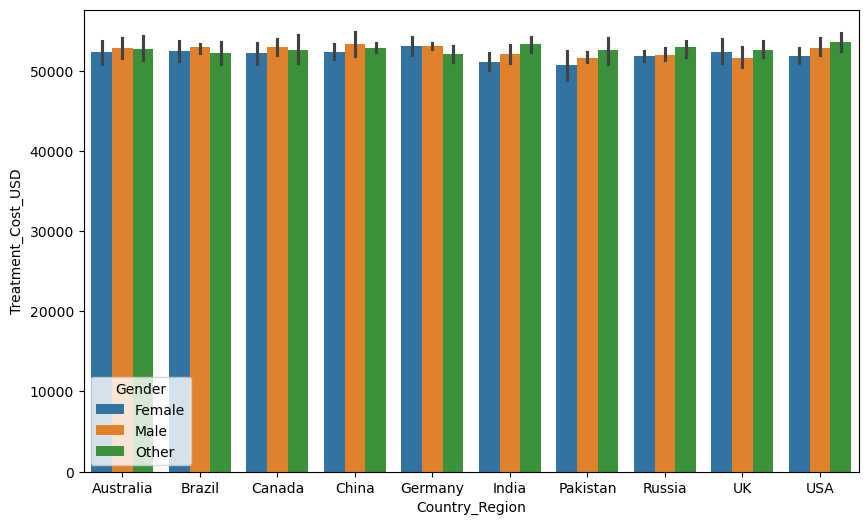

In [ ]:
country_age_cost = data.groupby(["Country_Region","Age_Group","Gender"])["Treatment_Cost_USD"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=country_age_cost,x="Country_Region",y="Treatment_Cost_USD", hue="Gender")

plt.title("average cancer treatment cost by country and gender")


In [56]:
country_age_cost= data.groupby(["Country_Region", "Age_Group"])["Treatment_Cost_USD"].mean().reset_index()

In [57]:
heatmap_data= country_age_cost.pivot(index="Age_Group", columns="Country_Region", values="Treatment_Cost_USD")

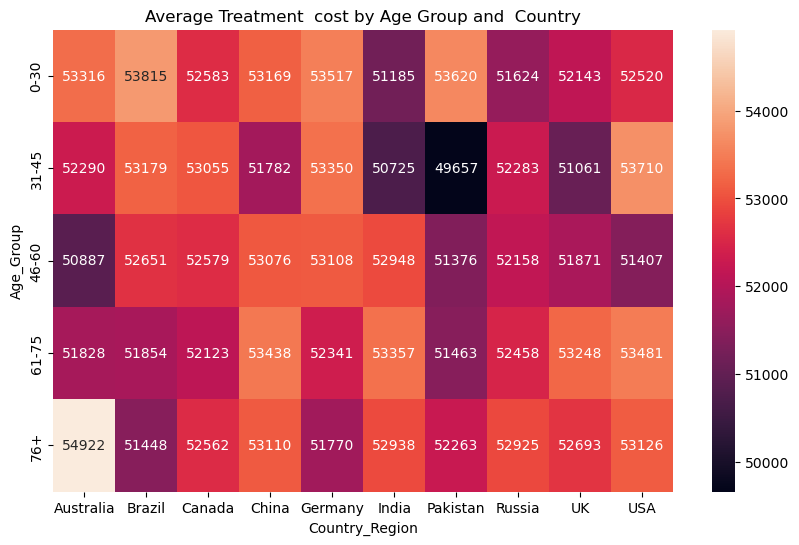

In [61]:
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f")
plt.title("Average Treatment  cost by Age Group and  Country")
plt.show()

## Assess whether higher treatment cost is associated with longer survival

In [62]:
from scipy.stats  import pearsonr, spearmanr
x= data["Treatment_Cost_USD"]
y=data["Survival_Years"]

# performing pearson correlation test
pearson_corr, pearson_p = pearsonr(x,y)
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"Pearson P-Value : {pearson_p}")

# Spearman correlation test
spearman_corr, spearman_p = spearmanr(x,y)
print(f"spearman Correlation Coefficient: {spearman_corr}")
print(f"spearman P-Value : {spearman_p}")

alpha=0.05

def interpret_corr(corr, p, method):
    if p<alpha:
        print(f"{method}, we  reject thr hull hypothesis")
    else:
        print(f"{method}, we failed to reject null hypothesis")

interpret_corr(pearson_corr,pearson_p,"Pearson")
interpret_corr(spearman_corr,spearman_p,"Spearman")

Pearson Correlation Coefficient: -0.00042940542830214657
Pearson P-Value : 0.9235082012963326
spearman Correlation Coefficient: -0.0004454737292549569
spearman P-Value : 0.9206551702014918
Pearson, we failed to reject null hypothesis
Spearman, we failed to reject null hypothesis


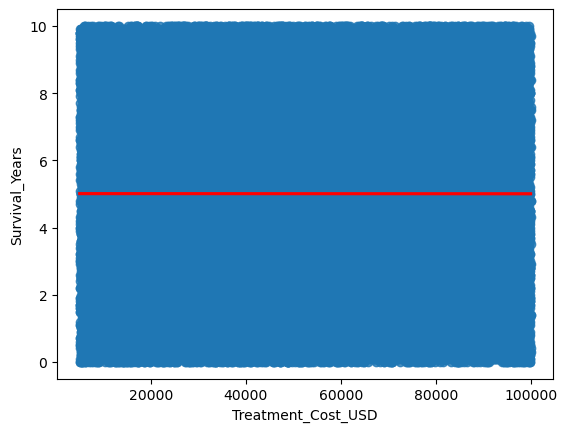

In [63]:
 sns.regplot(x=x, y=y, line_kws={"color":"red"})
plt.show()

## Evaluate if higher cancer stages lead to greater treatment costs and reduced survival years

In [64]:
df = data.copy()

In [65]:
stage_order = ['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV']

In [66]:
grouped_stats= df.groupby("Cancer_Stage")[["Treatment_Cost_USD","Survival_Years"]].mean().reset_index()

In [67]:
grouped_stats

,Cancer_Stage,Treatment_Cost_USD,Survival_Years
0,Stage 0,52572.589493,5.015199
1,Stage I,52674.079638,5.012990
2,Stage II,52082.841258,4.995170
3,Stage III,52708.197506,5.036311
4,Stage IV,52302.471041,4.972596


In [72]:
grouped_cost = []
goruped_survival= []

for stage in stage_order:
    stage_data= df[df["Cancer_Stage"]==stage]
    cost= stage_data["Treatment_Cost_USD"]
    survival= stage_data["Survival_Years"]
    grouped_cost.append(cost)
    goruped_survival.append(survival)

In [73]:
grouped_cost

[1        12573.41
 6         9790.83
 17       56875.63
 22       89075.81
 29       32889.23
            ...   
 49988    52763.24
 49989    30400.57
 49995    71463.70
 49997     5338.25
 49999    64023.82
 Name: Treatment_Cost_USD, Length: 9889, dtype: float64,
 3        67446.25
 7        17161.40
 10       15093.39
 11       72315.19
 19       40131.04
            ...   
 49979     9090.63
 49981    94507.13
 49987    51598.72
 49993    75193.19
 49996    49619.66
 Name: Treatment_Cost_USD, Length: 10046, dtype: float64,
 2         6984.33
 8        56458.48
 9        56133.45
 12       99120.52
 13       94210.93
            ...   
 49973    58707.61
 49978    88123.42
 49990    38290.91
 49991    73592.91
 49992    99623.46
 Name: Treatment_Cost_USD, Length: 10124, dtype: float64,
 0        62913.44
 4        77977.12
 16       59285.13
 28       97036.73
 31       65719.90
            ...   
 49968    46434.35
 49976    52551.96
 49980    72094.76
 49983    47086.44
 49994    

In [74]:
len(grouped_cost)

5

In [77]:
# check for normaility
from scipy.stats import  shapiro, f_oneway
normal_cost=0
normal_survival=0

for i in range (len(stage_order)):
    cost_p= shapiro(grouped_cost[i]).pvalue
    surv_p= shapiro(goruped_survival[i]).pvalue 
    print(f" cost {cost_p} for group {i}")
    print(f"Survival {surv_p} for group {i}")
    if cost_p<0.05:
        normal_cost+=1
    if surv_p<0.05:
        normal_survival+=1



 cost 1.5471821061637387e-47 for group 0
Survival 1.6291039522109283e-47 for group 0
 cost 7.306523956950957e-48 for group 1
Survival 7.575551046259697e-48 for group 1
 cost 8.943579643043388e-48 for group 2
Survival 4.041659465829829e-48 for group 2
 cost 5.267270033022367e-48 for group 3
Survival 1.3648520457944784e-47 for group 3
 cost 1.5838640189581322e-47 for group 4
Survival 2.2992598289836786e-47 for group 4


In [78]:
print(normal_cost)
print(normal_survival)

5
5


In [79]:
from scipy.stats import kruskal

In [81]:
kusrkal_cost =kruskal(*grouped_cost)
kurkal_survival= kruskal(*goruped_survival)

p_cost= kusrkal_cost.pvalue
p_survival= kurkal_survival.pvalue


In [82]:
p_cost

0.4254451689062656

In [83]:
p_survival

0.6033078729984223

## Examine whether higher genetic risk amplifies the negative effects of smoking on cancer severity and survival outcomes

In [84]:
import statsmodels.formula.api as smf

model = smf.ols("Target_Severity_Score ~ Genetic_Risk*Smoking", data=data).fit()

model.summary2().tables[1].loc["Genetic_Risk:Smoking"]

Coef.      -0.000228
Std.Err.    0.000471
t          -0.484187
P>|t|       0.628255
[0.025     -0.001150
0.975]      0.000694
Name: Genetic_Risk:Smoking, dtype: float64